***
# ADVECTION-DIFFUSION SCHEMES
***

* Governing equation for steady advection-diffusion process with internal scalar source:

    \begin{equation}\nabla \cdot \left(\rho u \phi\right) - \nabla \cdot \left(\Gamma \nabla \phi \right) = S_{\phi}\end{equation}
    
* Integrating over the control volume:
    
    \begin{equation}\int_{cv} \left[ \nabla \cdot \left(\rho u \phi\right) - \nabla \cdot \left(\Gamma \nabla \phi \right) \right] dV = \int_{cv} S_{\phi} dV\end{equation}
    
* Applying Gauss divergence theorem to the advection and diffusion term:

   \begin{equation}\int_{cs} \mathbf{n} \cdot \left[\rho u \phi - \Gamma \nabla \phi \right] dS = \int_{cv} S_{\phi} dV\end{equation}
   
* For 1-D problems, this simplifies to:
    
    \begin{equation}\left(\rho u \phi\right)_e - \left(\rho u \phi\right)_w + \Gamma_w \frac{\phi_P - \phi_W}{\delta x_w} - \Gamma_e \frac{\phi_E - \phi_P}{\delta x_e} = S_{\phi} \Delta x\end{equation}
    
* Setting $S_{\phi} = 0$:

    \begin{equation}\left(\rho u \phi\right)_e - \left(\rho u \phi\right)_w + \Gamma_w \frac{\phi_P - \phi_W}{\delta x_w} - \Gamma_e \frac{\phi_E - \phi_P}{\delta x_e} = 0\end{equation}

* From incompressible 1-D continuity equation, $\frac{\partial \left(\rho u\right)}{\partial x} = 0$, $\rho u$ is a constant:

    \begin{equation}\rho u \phi_e - \rho u \phi_w + \Gamma_w \frac{\phi_P - \phi_W}{\delta x_w} - \Gamma_e \frac{\phi_E - \phi_P}{\delta x_e} = 0\end{equation}
    
* If the grid is uniformly spaced, then $\delta x_e = \delta x_w = \Delta x$:

    \begin{equation}\rho u \phi_e - \rho u \phi_w + \Gamma_w \frac{\phi_P - \phi_W}{\Delta x} - \Gamma_e \frac{\phi_E - \phi_P}{\Delta x} = 0\end{equation}
    
* If the diffusion coefficient is constant, then $\Gamma_e = \Gamma_w = \Gamma$:

    \begin{equation}\rho u \phi_e - \rho u \phi_w + \Gamma \frac{\phi_P - \phi_W}{\Delta x} - \Gamma \frac{\phi_E - \phi_P}{\Delta x} = 0\end{equation}
    
* Re-arranging:

    \begin{equation}\rho u \phi_e - \rho u \phi_w + \frac{\Gamma}{\Delta x} \left(2\phi_P - \phi_W - \phi_E \right) = 0\end{equation}
    
* Multiplying through by $\frac{\Delta x}{\Gamma}$
    
    \begin{equation}\frac{\rho u \Delta x}{\Gamma} \left(\phi_e - \phi_w\right) + \left(2\phi_P - \phi_W - \phi_E \right) = 0\end{equation}
    
* The dimensionless term $\frac{\rho u \Delta x}{\Gamma}$ is known as the Peclet number $Pe$ and it measures the relative strengths of advection and diffusion processes. The Peclet number takes on small values when diffusion is the dominant mechanism and large values when advection is dominant. 

    \begin{equation}Pe \left(\phi_e - \phi_w\right) + \left(2\phi_P - \phi_W - \phi_E \right) = 0\end{equation}
    
* The central difference scheme has been employed in the discretization of the diffusion term. Below, various differencing schemes will be compared for the evaluation of cell face values of $\phi$ in the advection term.

## CENTRAL DIFFERENCE SCHEME
***

* The central difference scheme assumes a piece-wise linear profile between two neighbouring nodes.
    
    ![central-difference](advection1.svg)

* For a uniform grid, the cell face values are given by:

    \begin{equation}\phi_f = \frac{\phi_i + \phi_{i-1}}{2}\end{equation}
    
    \begin{equation}\phi_e = \frac{\phi_E + \phi_P}{2}\end{equation}
    
    \begin{equation}\phi_w = \frac{\phi_P + \phi_W}{2}\end{equation}
    
* Plugging $\phi_e$ and $\phi_w$ into the final equation from the previous section:

    \begin{equation}Pe \left(\frac{\phi_E + \phi_P}{2} - \frac{\phi_P + \phi_W}{2}\right) + \left(2\phi_P - \phi_W - \phi_E\right) = 0\end{equation}
    
* Re-arranging the advection term, we see that the central difference scheme is oblivious to the state of node P. This can result in a non-physical solution especially if continuity is not obeyed at any point during the simulation.

    \begin{equation}\frac{Pe}{2} \left(\phi_E - \phi_W\right) + \left(2\phi_P - \phi_W - \phi_E\right) = 0\end{equation}
    
* Isolating $\phi_P$:
    
    \begin{equation}2\phi_P = -\frac{Pe}{2}\left(\phi_E - \phi_W\right) + \phi_E + \phi_W\end{equation}
    
    \begin{equation}\phi_P = -\frac{Pe}{4}\left(\phi_E-\phi_W\right) + \frac{\phi_E + \phi_W}{2}\end{equation}
    
* Subtracting $\phi_W$ from both sides of the equation:

    \begin{equation}\phi_P - \phi_W = -\frac{Pe}{4}\left(\phi_E-\phi_W\right) + \frac{\phi_E - \phi_W}{2}\end{equation}
    
* Dividing through by ($\phi_E - \phi_W$):

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{1}{2} \left[1 - \frac{Pe}{2}\right]\end{equation}
    
## EXACT SCHEME
*** 

* Considering steady 1-D advection-diffusion problem in x, the governing equation is given by:

    \begin{equation}\frac{d \left(\rho u \phi\right)}{dx} = \frac{d}{dx}\left(\Gamma \frac{d\phi}{dx}\right)\end{equation}

* Integrating both sides once:

    \begin{equation}\int \rho u\frac{d\phi}{dx} dx = \int \frac{d}{dx}\left(\Gamma \frac{d\phi}{dx}\right) dx\end{equation}

    \begin{equation}\frac{d \phi}{dx} = \frac{\rho u \phi}{\Gamma} - \frac{C_1}{\Gamma}\end{equation}

* Change of variable:

    \begin{equation}\Phi = \frac{\rho u \phi}{\Gamma} - \frac{C_1}{\Gamma}\end{equation}

* Differentiating the new variable with respect to x:

    \begin{equation}\frac{d\Phi}{dx} = \frac{\rho u}{\Gamma}\frac{d\phi}{dx}\end{equation}

    \begin{equation}\frac{d\phi}{dx} = \frac{\Gamma}{\rho u}\frac{d\Phi}{dx}\end{equation}

* With the above change of variable, we get:

    \begin{equation}\frac{d\Phi}{dx} = \frac{\rho u \Phi}{\Gamma}\end{equation}

* Separating variables and integrating:

    \begin{equation}\int \frac{d\Phi}{\Phi} = \int \frac{\rho u}{\Gamma} dx\end{equation}

    \begin{equation}ln\left(\Phi\right) = \frac{\rho u x}{\Gamma} + C_3\end{equation}

    \begin{equation}\Phi = C_2 e^{\left(\frac{\rho u x}{\Gamma}\right)}\end{equation}

* Plugging in the definition for $\Phi$:

    \begin{equation}\phi = \frac{C_2 \Gamma e^{\left(\frac{\rho u x}{\Gamma}\right)} + C_1}{\rho u}\end{equation}

* For central, east and west grid points:
    
    \begin{equation}\phi_P = \frac{C_2 \Gamma e^{\left(\frac{\rho u x_P}{\Gamma}\right)} + C_1}{\rho u}\end{equation}
    
    \begin{equation}\phi_E = \frac{C_2 \Gamma e^{\left(\frac{\rho u x_E}{\Gamma}\right)} + C_1}{\rho u}\end{equation}

    \begin{equation}\phi_W = \frac{C_2 \Gamma e^{\left(\frac{\rho u x_W}{\Gamma}\right)} + C_1}{\rho u}\end{equation}

* The dimensionless quantity $\frac{\phi_P - \phi_W}{\phi_E - \phi_W}$ can be obtained for the exact solution as follows:

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{e^{\left(\frac{\rho u x_P}{\Gamma}\right)} - e^{\left(\frac{\rho u x_W}{\Gamma}\right)}}{e^{\left(\frac{\rho u x_E}{\Gamma}\right)} -  e^{\left(\frac{\rho u x_W}{\Gamma}\right)}}\end{equation}

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{e^{\left(\frac{\rho u x_W}{\Gamma}\right)}\left[e^{\left(\frac{\rho u (x_P - x_W)}{\Gamma}\right)} - 1 \right]}{e^{\left(\frac{\rho u x_W}{\Gamma}\right)}\left[e^{\left(\frac{\rho u (x_E-X_W)}{\Gamma}\right)} -  1\right]}\end{equation}

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{\left[e^{\left(\frac{\rho u (x_P-x_W)}{\Gamma}\right)} - 1 \right]}{\left[e^{\left(\frac{\rho u (x_E-X_W)}{\Gamma}\right)} -  1\right]}\end{equation}

* Recognizing that $x_P-x_W = \Delta x$ and $x_E-x_W = 2\Delta x$:

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{\left[e^{\left(\frac{\rho u \Delta x}{\Gamma}\right)} - 1 \right]}{\left[e^{\left(2\frac{\rho u \Delta x}{\Gamma}\right)} -  1\right]}\end{equation}

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{e^{Pe} - 1}{e^{\left(2Pe\right)} -  1}\end{equation}

In [1]:
from numpy import linspace, maximum, exp, abs
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['legend.frameon']=False
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['font.size'] = 14

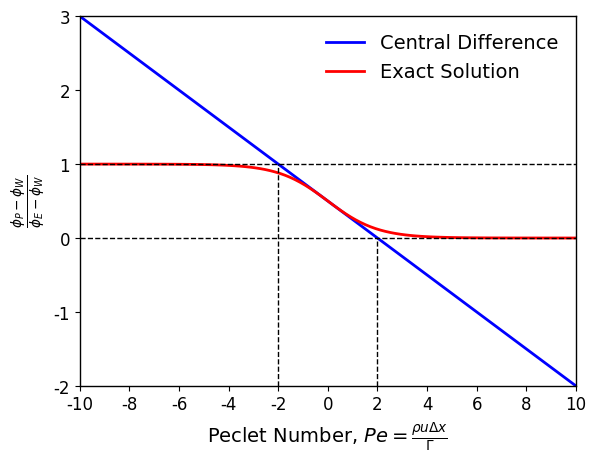

In [2]:
# Peclet numbers
Pe = linspace(-10,10,100)

# central difference
dimless_phi_cd = 0.5*(1.0 - 0.5*Pe)

# exact solution
dimless_phi_exact = (exp(Pe) - 1.0)/(exp(2.0*Pe) - 1.0)

# compare solutions
plt.plot(Pe, dimless_phi_cd, linestyle='solid', color='blue', label=r'Central Difference')
plt.plot(Pe, dimless_phi_exact,linestyle='solid', color='red', label=r'Exact Solution')
plt.axhline(y=1, linestyle='dashed', color='black',linewidth=1)
plt.axhline(y=0, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=-2, ymin=-2, ymax=1, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=2, ymin=-2, ymax=0, linestyle='dashed', color='black', linewidth=1)
xticks = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
yticks = [-2, -1, 0, 1, 2, 3]
plt.xticks(xticks, xticks, fontsize=12)
plt.yticks(yticks, yticks, fontsize=12)
plt.xlim([-10,10])
plt.ylim([-2,3])
plt.xlabel(r'Peclet Number, $Pe = \frac{\rho u \Delta x}{\Gamma}$')
plt.ylabel(r'$\frac{\phi_P - \phi_W}{\phi_E - \phi_W}$')
plt.legend()
plt.show()

## UPWIND SCHEME
***

* From the graphical comparison of central difference and exact solution, we see that the central difference scheme is valid for a narrow range of Peclet numbers ($-2 < Pe < 2$), where diffusion is dominant. At higher Peclet numbers, where advective effects take over, the central difference solution exceeds the limits imposed by the dimensionless $\phi$, which must be between 0 and 1. 

* While diffusion happens in all directions, advection is a strongly unidirectional process. The central difference scheme does not make use of this fact, hence its poor performance at high Peclet numbers. Given that the Peclet number is dependent on grid spacing, a finer grid could be constructed for any problem to restrict the Peclet number within the applicable range, but this may not be possible for all flow conditions and physical properties. Besides, a scheme whose performance is satisfactory on a coarser grid will always be preferable. While the performance of the exact scheme is satisfactory, it was derived for a 1-D problem and its extension to multiple dimensions may be problematic. For multidimensional problems, an alternative scheme is thus needed. Here, we will look at the upwind scheme.

* We start from the same discretized equation:

    \begin{equation}Pe \left[\phi_e - \phi_w\right] + \left[2\phi_P - \phi_E -\phi_W\right] = 0\end{equation}

* We need to determine the cell face values of $\phi$ that show up in the advection term. The upwind scheme takes the cell face value of $\phi$ to be the value at the node upstream. 

    \begin{equation}\phi_e = \begin{cases} \phi_P \text{ if } Pe > 0 \\ \phi_E \text{ if } Pe < 0\end{cases}\end{equation}

    \begin{equation}\phi_w = \begin{cases} \phi_W \text{ if } Pe > 0 \\ \phi_P \text{ if } Pe < 0\end{cases}\end{equation}

* The above conditionals can be re-expressed as single equations:

    \begin{equation}Pe \phi_e = \phi_P \max \left(Pe, 0\right) - \phi_E \max \left(-Pe, 0\right)\end{equation}

    \begin{equation}Pe \phi_w = \phi_W \max \left(Pe, 0\right) - \phi_P \max \left(-Pe, 0\right)\end{equation}

* Plugging in the above expressions:

    \begin{equation}\left[\phi_P \max \left(Pe, 0\right) - \phi_E \max \left(-Pe, 0\right)\right] -  \left[\phi_W \max \left(Pe, 0\right) - \phi_P \max \left(-Pe, 0\right)\right] + \left[2\phi_P - \phi_E -\phi_W\right] = 0\end{equation}

* Re-arranging:

    \begin{equation}\left[2 + \max \left(Pe, 0\right) + \max \left(-Pe, 0\right) \right] \phi_P = \left[1 + \max \left(-Pe, 0\right)\right]\phi_E + \left[1 + \max \left(Pe, 0\right)\right]\phi_W\end{equation}

    \begin{equation}a_P \phi_P = a_E \phi_E + a_W \phi_W\end{equation}
    
    \begin{equation}a_P = a_E + a_W\end{equation}

* Expressing $\phi_P$ in terms of $\phi_E$, $\phi_W$, and coefficients ($a_E$, $a_W$, and $a_P$)

    \begin{equation}\phi_P = \frac{a_E \phi_E + a_W\phi_W}{a_P}\end{equation}

    \begin{equation}\phi_P = \frac{a_E \phi_E + a_W\phi_W}{a_E + a_W}\end{equation}

* Subtracting $\phi_W$ from both sides of the equation:

    \begin{equation}\phi_P - \phi_W = \frac{a_E \phi_E + a_W\phi_W}{a_E + a_W} - \phi_W\end{equation}

    \begin{equation}\phi_P - \phi_W = \frac{a_E \phi_E + a_W\phi_W - a_E \phi_W - a_W\phi_W}{a_E + a_W}\end{equation}

    \begin{equation}\phi_P - \phi_W = \frac{a_E \left(\phi_E - \phi_W\right)}{a_E + a_W}\end{equation}

* Dividing through by $\phi_E - \phi_W$:

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{a_E}{a_E + a_W}\end{equation}

* Plugging in the expressions for $a_E$ and $a_W$:

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{1 + \max \left(-Pe_L, 0\right)}{2 + \max \left(Pe_L, 0\right) + \max \left(-Pe_L, 0\right)}\end{equation}

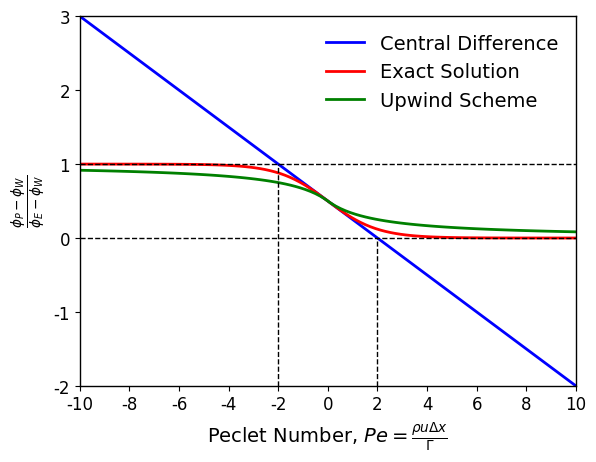

In [3]:
# upwind scheme solution
dimless_phi_upwind = (1.0 + maximum(-Pe,0))/(2.0 + maximum(Pe,0) + maximum(-Pe,0))

# compare to other schemes
plt.plot(Pe, dimless_phi_cd, linestyle='solid', color='blue', label=r'Central Difference')
plt.plot(Pe, dimless_phi_exact,linestyle='solid', color='red', label=r'Exact Solution')
plt.plot(Pe, dimless_phi_upwind, linestyle='solid', color='green', label=r'Upwind Scheme')
plt.axhline(y=1, xmin=-10, xmax=10, linestyle='dashed', color='black', linewidth=1)
plt.axhline(y=0, xmin=-10, xmax=10, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=-2, ymin=-2, ymax=1, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=2, ymin=-2, ymax=0,linestyle='dashed', color='black', linewidth=1)
xticks = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
yticks = [-2, -1, 0, 1, 2, 3]
plt.xticks(xticks, xticks, fontsize=12)
plt.yticks(yticks, yticks, fontsize=12)
plt.xlim([-10,10])
plt.ylim([-2,3])
plt.xlabel(r'Peclet Number, $Pe = \frac{\rho u \Delta x}{\Gamma}$')
plt.ylabel(r'$\frac{\phi_P - \phi_W}{\phi_E - \phi_W}$')
plt.legend()
plt.show()

## DOWNWIND SCHEME
***

* Again, we start from the same discretized equation:

    \begin{equation}Pe\left[\phi_e - \phi_w\right] + \left[2\phi_P - \phi_E -\phi_W\right] = 0\end{equation}

* In contrast to the upwind scheme, the downwind scheme takes the cell face value of $\phi$ to be the value at the node downstream:

    \begin{equation}\phi_e = \begin{cases} \phi_E \text{ if } Pe > 0 \\ \phi_P \text{ if } Pe < 0\end{cases}\end{equation}

    \begin{equation}\phi_w = \begin{cases} \phi_P \text{ if } Pe > 0 \\ \phi_W \text{ if } Pe < 0\end{cases}\end{equation}

* Re-expressing the conditionals in more compact form:

    \begin{equation}Pe \phi_e = \phi_E \max \left(Pe, 0\right) - \phi_P \max \left(-Pe,0\right)\end{equation}

    \begin{equation}Pe \phi_w = \phi_P \max \left(Pe, 0\right) - \phi_W \max \left(-Pe,0\right)\end{equation}

* Plugging in the above expressions:

    \begin{equation}\left[\phi_E \max \left(Pe, 0\right) - \phi_P \max \left(-Pe,0\right)\right] - \left[\phi_P \max \left(Pe, 0\right) - \phi_W \max \left(-Pe,0\right)\right] + \left[2\phi_P - \phi_E -\phi_W\right] = 0\end{equation}
    
    \begin{equation}\left[2 - \max \left(-Pe,0\right) - \max \left(Pe,0\right)\right]\phi_P = \left[1 - \max \left(Pe_L, 0\right)\right]\phi_E + \left[1 - \max \left(-Pe, 0\right)\right] \phi_W\end{equation}

    \begin{equation}a_P \phi_P = a_E \phi_E + a_W \phi_W\end{equation}

    \begin{equation}a_P = a_E + a_W\end{equation}

* The dimensionless $\frac{\phi_P - \phi_W}{\phi_E - \phi_W}$ is similarly given by:

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{a_E}{a_E + a_W}\end{equation}

* Plugging in the definitions for $a_E$ and $a_W$:

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{1 - \max \left(Pe, 0\right)}{2 - \max \left(-Pe,0\right) - \max \left(Pe,0\right)}\end{equation}

* From the above equation, the value of the dimensionless $\phi$ approaches $\infty$ as $|Pe|$ approaches 2. While this is undesirable, the downwind scheme can still be useful when blended with other schemes to predict sharp interfaces.

## HYBRID SCHEME
***

* The hybrid scheme combines the strengths of central difference and upwind scheme. For $|Pe| < 2$, a central difference scheme which is second order accurate is employed. For $|Pe| > 2$, where the central difference begins to deviate from the exact solution, the first order accurate upwind scheme is used.

* The discretized equation and the corresponding coefficients are defined below:

    \begin{equation}a_P \phi_P = a_E\phi_E + a_W\phi_W\end{equation}

    \begin{equation}a_P = a_E + a_W + F_e  - F_w \end{equation}

    \begin{equation}a_E = \max \left[-F_e, \left(D_e - \frac{F_e}{2}\right), 0\right]\end{equation}

    \begin{equation}a_W = \max \left[F_w, \left(D_w + \frac{F_w}{2}\right), 0\right]\end{equation}

* For incompressible 1-D flow with constant diffusion coefficient on a uniform grid:

    \begin{equation}F_e = F_w = F = \rho u\end{equation}

    \begin{equation}D_e = D_w = D = \frac{\Gamma}{\Delta x}\end{equation}

* This simplifies the coefficients to the following:

    \begin{equation}a_P = a_E + a_W\end{equation}

    \begin{equation}a_E = \max \left[-F, \left(D - \frac{F}{2}\right), 0\right]\end{equation}

    \begin{equation}a_W = \max \left[F, \left(D + \frac{F}{2}\right), 0\right]\end{equation}

* If we divide the equation by D, then the coefficients become:

    \begin{equation}a_E = \max \left[-Pe, \left(1 - \frac{Pe}{2}\right), 0\right]\end{equation}

    \begin{equation}a_W = \max \left[Pe, \left(1 + \frac{Pe}{2}\right), 0\right]\end{equation}

* The dimensionles $\phi$ is still given by:

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{a_E}{a_E + a_W}\end{equation}

* Plugging in the coefficients:

    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{\max \left[-Pe, \left(1 - \frac{Pe}{2}\right), 0\right]}{\max \left[-Pe, \left(1 - \frac{Pe}{2}\right), 0\right] + \max \left[Pe, \left(1 + \frac{Pe}{2}\right), 0\right]}\end{equation}

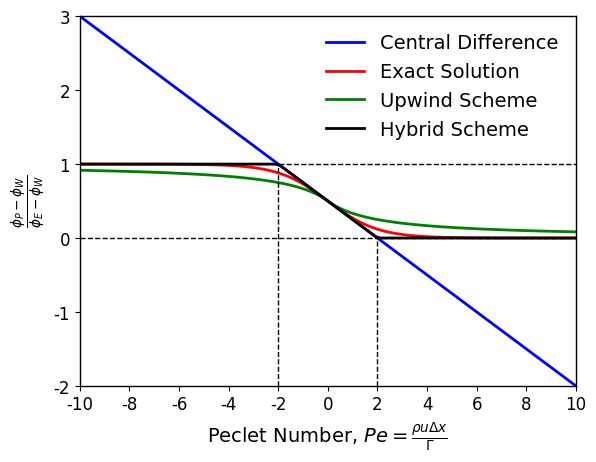

In [4]:
# Hybrid scheme solution
dimless_phi_hybrid = maximum(-Pe, maximum((1.0 - Pe/2.0), 0))/(maximum(-Pe, maximum((1.0 - Pe/2.0),0)) + maximum(Pe, maximum((1.0 + Pe/2.0),0)))

# compare to other schemes
plt.plot(Pe, dimless_phi_cd, linestyle='solid', color='blue', label=r'Central Difference')
plt.plot(Pe, dimless_phi_exact,linestyle='solid', color='red', label=r'Exact Solution')
plt.plot(Pe, dimless_phi_upwind, linestyle='solid', color='green', label=r'Upwind Scheme')
plt.plot(Pe, dimless_phi_hybrid, linestyle='solid', color='black', label=r'Hybrid Scheme')
plt.axhline(y=1, xmin=-10, xmax=10, linestyle='dashed', color='black', linewidth=1)
plt.axhline(y=0, xmin=-10, xmax=10, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=-2, ymin=-2, ymax=1, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=2, ymin=-2, ymax=0,linestyle='dashed', color='black', linewidth=1)
xticks = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
yticks = [-2, -1, 0, 1, 2, 3]
plt.xticks(xticks, xticks, fontsize=12)
plt.yticks(yticks, yticks, fontsize=12)
plt.xlim([-10,10])
plt.ylim([-2,3])
plt.xlabel(r'Peclet Number, $Pe = \frac{\rho u \Delta x}{\Gamma}$')
plt.ylabel(r'$\frac{\phi_P - \phi_W}{\phi_E - \phi_W}$')
plt.legend()
plt.show()

## POWER-LAW SCHEME
***

* From above graph, the hybrid  scheme over-estimates the exact solution close to $|Pe| = 2$.  This suggests that switching off diffusion as soon as $|Pe| = 2$ is premature. The power-law scheme recognizes this and sets a higher threshold of $|Pe| > 10$ for switching off diffusion.

* The cell face values of $\phi$ are given as follows:

    \begin{equation}\phi_w = \left[\phi_W - \beta_w \left(\phi_P - \phi_W\right)\right] \text{ for 0 < Pe < 10}\end{equation}
    
    \begin{equation}\phi_e = \left[\phi_P - \beta_e \left(\phi_E - \phi_P\right)\right] \text{ for 0 < Pe < 10}\end{equation}
    
    \begin{equation}\beta_w = \frac{\left(1 - 0.1 Pe_w\right)^5}{Pe_w}\end{equation}
    
    \begin{equation}\beta_e = \frac{\left(1 - 0.1 Pe_e\right)^5}{Pe_e}\end{equation}
    
* For a uniformly spaced grid, $\beta_w = \beta_e$ and $Pe_w = Pe_e$:

    \begin{equation}\phi_w = \left[\phi_W - \beta \left(\phi_P - \phi_W\right)\right] \text{ for 0 < Pe < 10}\end{equation}
    
    \begin{equation}\phi_e = \left[\phi_P - \beta \left(\phi_E - \phi_P\right)\right] \text{ for 0 < Pe < 10}\end{equation}
    
    \begin{equation}\beta = \frac{\left(1 - 0.1 Pe\right)^5}{Pe}\end{equation}
    
* Using the general form $a_P\phi_P = a_E\phi_E + a_W\phi_W$, the coefficients for the power-law scheme are:

    \begin{equation}a_P = a_E + a_W + \left(F_e - F_w\right)\end{equation}
    
    \begin{equation}a_E = \max \left[\left(1 - 0.1|Pe|\right)^5, 0\right] + \max \left[-Pe, 0\right]\end{equation}
    
    \begin{equation}a_W = \max \left[\left(1 - 0.1|Pe|\right)^5, 0\right] + \max \left[Pe, 0\right]\end{equation}
    
* From incompressible 1-D continuity, $F_e = F_w$:

    \begin{equation}a_P = a_E + a_W\end{equation}
    
    \begin{equation}a_E = \max \left[\left(1 - 0.1|Pe|\right)^5, 0\right] + \max \left[-Pe, 0\right]\end{equation}
    
    \begin{equation}a_W = \max \left[\left(1 - 0.1|Pe|\right)^5, 0\right] + \max \left[Pe, 0\right]\end{equation}
    
* The dimensionless $\phi$ is then given by:
    
    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{a_E}{a_E + a_W}\end{equation}
    
    \begin{equation}\frac{\phi_P - \phi_W}{\phi_E - \phi_W} = \frac{\max \left[\left(1 - 0.1|Pe|\right)^5, 0\right] + \max \left[-Pe, 0\right]}{2\max \left[\left(1 - 0.1|Pe|\right)^5, 0\right] + \max \left[-Pe, 0\right] + \max \left[Pe, 0\right]}\end{equation}

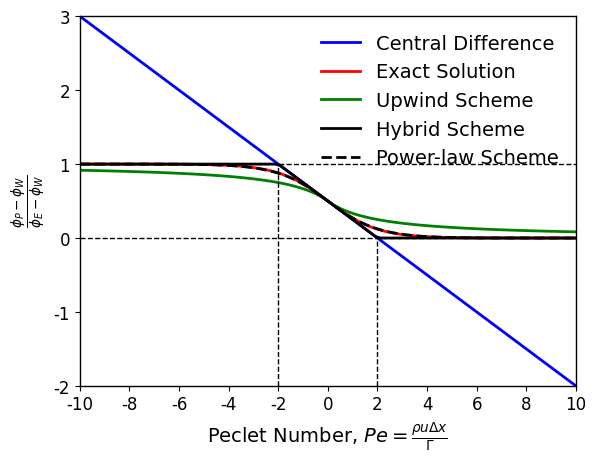

In [5]:
# power-law scheme solution
dimless_phi_powerlaw = (maximum((1.0 - 0.1*abs(Pe))**5,0) + maximum(-Pe,0))/(maximum(2.0*(1.0 - 0.1*abs(Pe))**5,0) + maximum(-Pe,0) + maximum(Pe,0)) 

# compare to other schemes
plt.plot(Pe, dimless_phi_cd, linestyle='solid', color='blue', label=r'Central Difference')
plt.plot(Pe, dimless_phi_exact,linestyle='solid', color='red', label=r'Exact Solution')
plt.plot(Pe, dimless_phi_upwind, linestyle='solid', color='green', label=r'Upwind Scheme')
plt.plot(Pe, dimless_phi_hybrid, linestyle='solid', color='black', label=r'Hybrid Scheme')
plt.plot(Pe, dimless_phi_powerlaw, linestyle='dashed', color='black', label=r'Power-law Scheme')
plt.axhline(y=1, xmin=-10, xmax=10, linestyle='dashed', color='black', linewidth=1)
plt.axhline(y=0, xmin=-10, xmax=10, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=-2, ymin=-2, ymax=1, linestyle='dashed', color='black', linewidth=1)
plt.vlines(x=2, ymin=-2, ymax=0,linestyle='dashed', color='black', linewidth=1)
xticks = [-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]
yticks = [-2, -1, 0, 1, 2, 3]
plt.xticks(xticks, xticks, fontsize=12)
plt.yticks(yticks, yticks, fontsize=12)
plt.xlim([-10,10])
plt.ylim([-2,3])
plt.xlabel(r'Peclet Number, $Pe = \frac{\rho u \Delta x}{\Gamma}$')
plt.ylabel(r'$\frac{\phi_P - \phi_W}{\phi_E - \phi_W}$')
plt.legend()
plt.show()

## NUMERICAL DIFFUSION
***

* One of the shortcomings of upwind scheme is that it tends to smear out gradients when the flow is not properly aligned with the grid. This is usually referred to as numerical or false diffusion. It can be shown mathematically or by using a 2-D simulation case in which the flow is directed diagonally. Here, we opt for the mathematical proof.

* Starting from:

    \begin{equation}\rho u \left[\phi_e - \phi_w\right] + \Gamma_w \left(\frac{d\phi}{dx}\right)_w - \Gamma_e \left(\frac{d\phi}{dx}\right)_e = 0\end{equation}

* If $\rho u > 0$:

    \begin{equation}\phi_e \approx \phi_P\end{equation}

    \begin{equation}\phi_w \approx \phi_W\end{equation}

* Plugging in above expressions:

    \begin{equation}\rho u \left[\phi_P - \phi_W\right] + \Gamma_w \left(\frac{d\phi}{dx}\right)_w - \Gamma_e \left(\frac{d\phi}{dx}\right)_e = 0\end{equation}

* Taylor series expansion of $\phi_P$, truncated after the second term:

    \begin{equation}\phi_P \approx \phi_e - \left(\frac{d\phi}{dx}\right)_e\left(x_P - x_e\right)\end{equation}

* Taylor series expansion of $\phi_W$, truncated after the second term:

    \begin{equation}\phi_W \approx \phi_w - \left(\frac{d\phi}{dx}\right)_w\left(x_W - x_w\right)\end{equation}

* Plugging in the Taylor series expansions of $\phi_P$ and $\phi_W$:

    \begin{equation}\rho u \left[\phi_e - \left(\frac{d\phi}{dx}\right)_e\left(x_P - x_e\right)\right] - \rho u\left[\phi_w - \left(\frac{d\phi}{dx}\right)_w\left(x_W - x_w\right)\right] + \Gamma_w \left(\frac{d\phi}{dx}\right)_w - \Gamma_e \left(\frac{d\phi}{dx}\right)_e = 0\end{equation}

* For a uniform grid, $\left(x_P - x_e\right) = \left(x_W - x_w\right) = \frac{\Delta x}{2}$:

    \begin{equation}\left[\rho u \phi_e - \frac{\rho u \Delta x}{2}\left(\frac{d\phi}{dx}\right)_e\right] - \left[\rho u \phi_w - \frac{\rho u \Delta x}{2}\left(\frac{d\phi}{dx}\right)_w\right] + \Gamma_w \left(\frac{d\phi}{dx}\right)_w - \Gamma_e \left(\frac{d\phi}{dx}\right)_e = 0\end{equation}

* Re-arranging:

    \begin{equation}\rho u\left[\phi_e - \phi_w\right] + \left[\left(\Gamma_w - \frac{\rho u \Delta x}{2}\right)\left(\frac{d\phi}{dx}\right)_w\right] - \left[\left(\Gamma_e - \frac{\rho u \Delta x}{2}\right) \left(\frac{d\phi}{dx}\right)_e \right] = 0\end{equation}

* The above equation resembles the equation we started with, but with an extra term ($-\frac{\rho u \Delta x}{2}$) added to the original diffusion coefficients. This extra term can be regarded as a numerical/false diffusion coefficient, which causes the gradients to be smeared out when the flow is not properly aligned with the grid.